In [1]:
############################################
#Question 1
# design and implement the solution to crawl all the unique URLs for the detailed
#publication pages. 
############################################

##############################
#Get page and import libraries
##############################
#import beautiful soup
import requests
from bs4 import BeautifulSoup
#Get the page which has all urls within it
MainUrl = "https://community.dur.ac.uk/hubert.shum/comp42315/publicationfull_year_characteranimation.htm"
page = requests.get(MainUrl)
soup = BeautifulSoup(page.content, "html.parser")

In [2]:
#######################################################################
#Find the body of text, ie we are not looking at the header or footer in this case
#"body" is the tag indicating body, "PageDefault" is the unique class
#p is the tag and "TextOption" is the specific information we need
#a is the beginning of a href tag that ecloses a url inside it, 
#so we ask the function to look for "a" which indicates wer have found a "<a href"
########################################################################

# Getting the links through the divs which hold images
body = soup.find("body", class_="PageDefault")
imageDiv = body.find("div", class_ ="ImgIconPublicationDiv")
#find the beginning of the href
url = imageDiv.find("a")
print(url)
#check we can find the url
if (url != None):
    urlPublication = url["href"]
    print(urlPublication)
else:
    print("Cannot find the link in the publication page!")

<a href="pbl_tvcg2021motionsynthesis.htm"><img alt="Webpage" class="ImgIconPublication" src="publications/tvcg2021deeplearning/images/icon.png" style="display:block"/></a>
pbl_tvcg2021motionsynthesis.htm


In [3]:
#####################################################################
#Firstly define variable that finds the html body section using tag and class
#Secondly create an empty list in which to store the urls the program has found
#Thirdly define a variable that finds the title of the movie(the section we are interested in) through the tag and class
####Start the Algorithm:
#Firstly for every title column the program finds, look for "a" (the beginning of a href tag)
#Secondly if we find an "a", append the information in the href to the title
#Thridly print the list urlMovies, but decrease the length by -1 upon each loop so that each url is only printed once
#Fourthly else the program does not find an "a" tell the user the program cannot find the link in the column title
#####################################################################
#define variable which finds the body and the class we are interested in
body = soup.find("body", class_="PageDefault")
#Create an empty List to store the urls
urlPublications = []
#Define variable that finds the title of the movie(the section we are interested in) through tag and class
imageDivs = body.find_all("div", class_ ="ImgIconPublicationDiv")

for imageDiv in imageDivs:
    url = imageDiv.find("a")
    if (url != None):
        urlPublications.append(url["href"])
        print(urlPublications[len(urlPublications)-1])
    else:
        print("Cannot find the link in the publication page!")

pbl_tvcg2021motionsynthesis.htm
pbl_tcsvt2021motionprediction.htm
pbl_cag2021reactivemotion.htm
pbl_cavw2019emotionanalysis.htm
pbl_mig2019dancesynthesis.htm
pbl_ace2017dancedj3d.htm
pbl_d2at2017emotionsynthesis.htm
pbl_siggraph2016dancegeneration.htm
pbl_hhm2016depthsensor.htm
pbl_pg2015latticemodel.htm
pbl_casa2014variationsynthesis.htm
pbl_pg2013topologyik.htm
pbl_cavw2013preparationsynthesis.htm
pbl_casa2013preparationsynthesis.htm
pbl_tvcg2012interactionsynthesis.htm
pbl_vrst2012physicalmodel.htm
pbl_patent2010interactionpatent.htm
pbl_thesis2010interactioncharacter.htm
pbl_casa2009angularmomentum.htm
pbl_siggraphasia2008interactionpatches.htm
pbl_i3d2008interactionavatars.htm
pbl_mig2008interactioncharacters.htm
pbl_vrst2007interactionsingly.htm
pbl_sca2006fightinggametree.htm
pbl_arxiv2006gametree.htm


In [4]:
##########################
#To convert the Urls to gobal Urls we can recognise we need to append information to the Urls 
#Firstly define a variable with the Url name as a string so the program knows the full Url
#Secondly, extracting the elements in the string from the 8th element onwards this gives us the the Url without the https://
#Thirdly find the / in the url
#Fourthly, create a variable which puts all the elements of the url together
######Start the Algorithm
#Begin with a new empty list in which to store global urls
#Firstly for every element in our previous list of urls (urlMovie) we add en element to our new list
#and add the web address to the urlmovie
#we print each global url list element but minus the length by one upon each iteration to ensure each element 
#is only printed once
#########################

# Getting the host name
hostUrl = "https://community.dur.ac.uk/hubert.shum/comp42315/publicationfull_year_characteranimation.htm"
urlWithoutHttps = hostUrl[8:] # "www.imdb.com/chart/moviemeter/?sort=i
iFirstSlash = urlWithoutHttps.find("/")
hostname = "/hubert.shum/comp42315/"
urlFolder = hostUrl[:8] + urlWithoutHttps[:iFirstSlash]
#create the global url
urlGlobal = []
for urlPublication in urlPublications:
    urlGlobal.append(urlFolder + hostname + urlPublication)
    print(urlGlobal[len(urlGlobal)-1])

https://community.dur.ac.uk/hubert.shum/comp42315/pbl_tvcg2021motionsynthesis.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_tcsvt2021motionprediction.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_cag2021reactivemotion.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_cavw2019emotionanalysis.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_mig2019dancesynthesis.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_ace2017dancedj3d.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_d2at2017emotionsynthesis.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_siggraph2016dancegeneration.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_hhm2016depthsensor.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_pg2015latticemodel.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_casa2014variationsynthesis.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_pg2013topologyik.htm
https://community.dur.ac.uk/hubert

In [5]:
###############################
#Question 2
#design and implement the solution to crawl all the text-based information of each
#publication from the website, to convert such information into a suitable data format, and to
#store it in a data file
##############################

for link in urlGlobal:
    print(link)

https://community.dur.ac.uk/hubert.shum/comp42315/pbl_tvcg2021motionsynthesis.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_tcsvt2021motionprediction.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_cag2021reactivemotion.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_cavw2019emotionanalysis.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_mig2019dancesynthesis.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_ace2017dancedj3d.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_d2at2017emotionsynthesis.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_siggraph2016dancegeneration.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_hhm2016depthsensor.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_pg2015latticemodel.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_casa2014variationsynthesis.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_pg2013topologyik.htm
https://community.dur.ac.uk/hubert

In [6]:
###################################
#Title
###################################
#Define empty list for the titles
Titles = []

for link in urlGlobal:
    # Getting the url upon each iteration
    page = requests.get(link)
    soup = BeautifulSoup(page.content, "html.parser")
    
    #find the h1 (Only the titles are contained in H1 tags in this case) 
    titleH1 = soup.find("h1")
    title = titleH1.text
    #print(title)
    Titles.append(title)

print(Titles)

['Spatio-temporal Manifold Learning for Human Motions via Long-horizon Modeling', 'A Quadruple Diffusion Convolutional Recurrent Network for Human Motion Prediction', 'GAN-based Reactive Motion Synthesis with Class-aware Discriminators for Human-human Interaction', 'A Generic Framework for Editing and Synthesizing Multimodal Data with Relative Emotion Strength', 'Automatic Sign Dance Synthesis from Gesture-based Sign Language', 'DanceDJ: A 3D Dance Animation Authoring System for Live Performance', 'Synthesizing Motion with Relative Emotion Strength', 'Automatic Dance Generation System Considering Sign Language Information', 'Depth Sensor based Facial and Body Animation Control', 'Multi-layer Lattice Model for Real-Time Dynamic Character Deformation', 'Human Motion Variation Synthesis with Multivariate Gaussian Processes', 'Topology Aware Data-Driven Inverse Kinematics', 'Natural Preparation Behavior Synthesis', 'Preparation Behaviour Synthesis with Reinforcement Learning', 'Simulating 

In [7]:
###################################
#Abstract
###################################
#Define empty list for the abstracts
Abstracts = []

for link in urlGlobal:
    # Getting the url upon each iteration
    page = requests.get(link)
    soup = BeautifulSoup(page.content, "html.parser")

    #find the abstract 
    abstractDiv = soup.find("div", attrs = {"style": "margin-left: var(--size-marginleft)"})
    #print(abstractDiv) # check this works
    abstract = abstractDiv.p.text
    #print(abstract)
    Abstracts.append(abstract)
print(Abstracts)


['Data-driven modeling of human motions is ubiquitous in computer graphics and computer vision applications, such as synthesizing realistic motions or recognizing actions. Recent research has shown that such problems can be approached by learning a natural motion manifold using deep learning on a large amount data, to address the shortcomings of traditional data-driven approaches. However, previous deep learning methods can be sub-optimal for two reasons. First, the skeletal information has not been fully utilized for feature extraction. Unlike images, it is difficult to define spatial proximity in skeletal motions in the way that deep networks can be applied for feature extraction. Second, motion is time-series data with strong multi-modal temporal correlations between frames. On the one hand, a frame could be followed by several candidate frames leading to different motions; on the other hand, long-range dependencies exist where a number of frames in the beginning correlate to a numb

In [8]:
Authors = []

for link in urlGlobal:
    # Getting the url upon each iteration
    page = requests.get(link)
    soup = BeautifulSoup(page.content, "html.parser")
    
    #find the div where the authors are
    authorDiv = soup.find("div",  attrs = {"style": "display:block;min-width:280px;max-width:300px;float:left;text-align:left;overflow:hidden;margin-left:var(--size-marginleft);"} )
    #print(authorDiv) #check this works
    authors = authorDiv.p.text
    #print(authors) #check this works
    authorEnding = authors.find(', "')
    listAuthors = authors[:authorEnding]
    #print(listAuthors) #check this works #may have to change this later for question about authors, maybe need new line
    authorsWithoutComma = listAuthors.replace(',', ",")
    #print(authorsWithoutComma) #check this works
    author = authorsWithoutComma.replace('and', ",")
    #print(author)
    #author = author.split(',')
    Authors.append(author)
    
print(Authors)

['He Wang, Edmond S. L. Ho, Hubert P. H. Shum , Zhanxing Zhu', 'Qianhui Men, Edmond S. L. Ho, Hubert P. H. Shum , Howard Leung', 'Qianhui Men, Hubert P. H. Shum, Edmond S. L. Ho , Howard Leung', 'Jacky C. P. Chan, Hubert P. H. Shum, He Wang, Li Yi, Wei Wei , Edmond S. L. Ho', 'Naoya Iwamoto, Hubert P. H. Shum, Wakana Asahina , Shigeo Morishima', 'Naoya Iwamoto, Takuya Kato, Hubert P. H. Shum, Ryo Kakitsuka, Kenta Hara , Shigeo Morishima', 'Edmond S. L. Ho, Hubert P. H. Shum, He Wang , Li Yi', 'Wakana Asahina, Naoya Iwamoto, Hubert P. H. Shum , Shigeo Morishima', 'Yijun Shen, Jingtian Zhang, Longzhi Yang , Hubert P. H. Shum', 'Naoya Iwamoto, Hubert P. H. Shum, Longzhi Yang , Shigeo Morishima', 'Liuyang Zhou, Lifeng Shang, Hubert P. H. Shum , Howard Leung', 'Edmond S. L. Ho, Hubert P. H. Shum, Yiu-ming Cheung , P. C. Yuen', 'Hubert P. H. Shum, Ludovic Hoyet, Edmond S. L. Ho, Taku Komura , Franck Multon', 'Hubert P. H. Shum, Ludovic Hoyet, Edmond S. L. Ho, Taku Komura , Franck Multon', 'H

In [9]:
###################################
#Dates
###################################
#Define empty list for the dates
Dates = []

for link in urlGlobal:
    # Getting the url upon each iteration
    page = requests.get(link)
    soup = BeautifulSoup(page.content, "html.parser")
    
    #find the date
    dateDiv = soup.find("div",  attrs = {"style": "display:block;min-width:280px;max-width:300px;float:left;text-align:left;overflow:hidden;margin-left:var(--size-marginleft);"} )
    #print(dateDiv) #check this works
    dateWithDot = dateDiv.p.text.split()[-1]
    #print(dateWithDot) #check this works
    date = dateWithDot[:-1] #remove the fullstop
    Dates.append(date)
    print(Dates)

['2021']
['2021', '2021']
['2021', '2021', '2021']
['2021', '2021', '2021', '2019']
['2021', '2021', '2021', '2019', '2019']
['2021', '2021', '2021', '2019', '2019', '2017']
['2021', '2021', '2021', '2019', '2019', '2017', '2017']
['2021', '2021', '2021', '2019', '2019', '2017', '2017', '2016']
['2021', '2021', '2021', '2019', '2019', '2017', '2017', '2016', '2016']
['2021', '2021', '2021', '2019', '2019', '2017', '2017', '2016', '2016', '2015']
['2021', '2021', '2021', '2019', '2019', '2017', '2017', '2016', '2016', '2015', '2014']
['2021', '2021', '2021', '2019', '2019', '2017', '2017', '2016', '2016', '2015', '2014', '2013']
['2021', '2021', '2021', '2019', '2019', '2017', '2017', '2016', '2016', '2015', '2014', '2013', '2013']
['2021', '2021', '2021', '2019', '2019', '2017', '2017', '2016', '2016', '2015', '2014', '2013', '2013', '2013']
['2021', '2021', '2021', '2019', '2019', '2017', '2017', '2016', '2016', '2015', '2014', '2013', '2013', '2013', '2012']
['2021', '2021', '2021', 

In [10]:
###################################
#Journal
###################################
#Define empty list for the journals
Journals = []

for link in urlGlobal:
    # Getting the url upon each iteration
    page = requests.get(link)
    soup = BeautifulSoup(page.content, "html.parser")
    
    #find journal article- this is more complex need some if clauses and a list
    journalDiv = soup.find("div",  attrs = {"style": "display:block;min-width:280px;max-width:300px;float:left;text-align:left;overflow:hidden;margin-left:var(--size-marginleft);"} )
    #print(journalDiv) #check this works
    journals = journalDiv.em
    #print(journals)
    #remove em
    if (journals != None):
        journal = journals.text
        journal = journal.replace("'08:", "")
        journal = journal.replace("'21:", "")
        journal = journal.replace("'17:", "")
        journal = journal.replace("'19:", "")
        journal = journal.replace("'12:", "")
        journal = journal.replace("'16:", "")
        journal = journal.replace("'13:", "")
        journal = journal.replace("'06:", "")
        journal = journal.replace("'07:", "")
        journal = journal.replace("preprint arXiv:2006.11620", "")
        Journals.append(journal)
    else:
        Journals.append("NA")
        #Journals.append(journal)
print(Journals)

['IEEE Transactions on Visualization and Computer Graphics', 'IEEE Transactions on Circuits and Systems for Video Technology', 'Computers and Graphics', 'Computer Animation and Virtual Worlds', ' MIG  ', ' ACE  ', ' D2AT  ', ' SIGGRAPH  ', ' Motion  ', 'Computer Graphics Forum', 'Computer Animation and Virtual Worlds', 'Computer Graphics Forum', 'Computer Animation and Virtual Worlds', ' CASA  ', 'IEEE Transactions on Visualization and Computer Graphics', ' VRST  ', 'NA', 'NA', 'Computer Animation and Virtual Worlds', 'ACM Transactions on Graphics', ' I3D  ', ' MIG  ', ' VRST  ', ' SCA  ', 'arXiv ']


In [11]:
###################################
#Volume
###################################
#Define empty list for the volumes
Volumes = []

for link in urlGlobal:
    # Getting the url upon each iteration
    page = requests.get(link)
    soup = BeautifulSoup(page.content, "html.parser")
    
    
    #Find VolumeNumber
    volDivNumber = soup.find("td")
    #print(journalDivNumber)
    volClass = volDivNumber.find("p", class_="TextSmallDefault")
    #print(journalClass)
    volDivText = volClass.text
    #print(journalDivText)
    
    import re
    txt = volDivText
    x = re.findall("volume={", txt)
    if (x):
        iBeginning = volDivText.find("volume")
        iEnding = volDivText.find("}, number")
        #print(journalDivText[iBeginning+8:iEnding])
        vNumber= volDivText[volDivText.find("volume")+8:volDivText.find("}, number")]
        #print(jNumber)
        split_string = vNumber.split("}", 1)
        substring = split_string[0]
        #print(substring)
        volNum = int(substring)
        #print(volNum)
        Volumes.append(volNum) 
    else:
        Volumes.append("NA")
print(Volumes)

[27, 31, 'NA', 30, 'NA', 'NA', 'NA', 'NA', 'NA', 34, 25, 32, 25, 'NA', 18, 'NA', 'NA', 'NA', 20, 27, 'NA', 'NA', 'NA', 'NA', 'NA']


In [12]:
###################################
#Publisher
###################################
#Define empty list for the publishers
Publishers = []

for link in urlGlobal:
    # Getting the url upon each iteration
    page = requests.get(link)
    soup = BeautifulSoup(page.content, "html.parser")
    
    #Find Publisher
    journalDivPublisher = soup.find("td")
    #print(journalDivNumber)
    journalPublisherClass = journalDivPublisher.find("p", class_="TextSmallDefault")
    #print(journalClass)
    publisherDivText = journalPublisherClass.text
    #print(publisherDivText)
    
    import re
    text = publisherDivText
    i = re.findall("publisher={", text)
    
    if (i):
        iBeginning = publisherDivText.find("publisher")
        iEnding = publisherDivText.find("},}")
        #print(publisherDivText[iBeginning+8:iEnding])
        jPublisher= publisherDivText[publisherDivText.find("publisher")+11:publisherDivText.find("},}")]
        #print(jPublisher)
        split_string_pub = jPublisher.split("}", 1)
        substring_pub = split_string_pub[0]
        #print(substring_pub)
        Publishers.append(substring_pub)
    else:
        Publishers.append("NA")
print(Publishers)

['IEEE', 'IEEE', 'Elsevier', 'John Wiley and Sons Ltd.', 'ACM', 'NA', 'NA', 'ACM', 'Springer International Publishing', 'John Wiley and Sons Ltd.', 'John Wiley and Sons Ltd.', 'John Wiley and Sons Ltd.', 'John Wiley and Sons Ltd.', 'John Wiley and Sons Ltd.', 'IEEE', 'ACM', 'WO Patent WO/2010/057897', 'University of Edinburgh', 'John Wiley and Sons Ltd.', 'ACM', 'ACM', 'Springer-Verlag', 'ACM', 'Eurographics Association', 'NA']


In [13]:
###################################
#Page numbers
###################################
#Define empty list for the page numbers
PageNumbers = []

for link in urlGlobal:
    # Getting the url upon each iteration
    page = requests.get(link)
    soup = BeautifulSoup(page.content, "html.parser")

    #Find Pages
    journalDivpages = soup.find("td")
    #print(journalDivNumber)
    journalpagesClass = journalDivpages.find("p", class_="TextSmallDefault")
    #print(journalClass)
    pagesDivText = journalpagesClass.text
    #print(pagesDivText)
    
    import re
    num = pagesDivText
    k = re.findall("pages={", num)
    
    if (k):
        iBeginning = pagesDivText.find("pages={")
        iEnding = pagesDivText.find("}, ")
        #print(publisherDivText[iBeginning+8:iEnding])
        jpages = pagesDivText[pagesDivText.find("pages={")+7:pagesDivText.find("}, ")]
        #print(jpages)
        split_string_pages = jpages.split("},", 1)
        substring_pages = split_string_pages[0]
        #print(substring_pages)
        PageNumbers.append(substring_pages)
    else:
        #print("NA")
        PageNumbers.append("NA")
print(PageNumbers)

['216--227', '3417--3432', '12', 'e1871', '18:1--18:9', '653--670', '8', '23:1--23:2', '16', '99--109', '301--309', '61--70', '531--542', '10', '741--752', '17--24', 'NA', '151', '385--394', '114:1--114:8', '131--138', '94--103', '65--72', '2', '7']


In [14]:
###################################
#Number of pages
###################################
#Define empty list for the number of page numbers
NumberOfPages = []

for link in urlGlobal:
    # Getting the url upon each iteration
    page = requests.get(link)
    soup = BeautifulSoup(page.content, "html.parser")
    
    #Find Number of Pages
    journalDivpagesNum = soup.find("td")
    #print(journalDivNumber)
    journalpagesNumClass = journalDivpagesNum.find("p", class_="TextSmallDefault")
    #print(journalClass)
    pagesNumDivText = journalpagesNumClass.text
    #print(pagesDivText)
         
        
    import re
    num = pagesNumDivText
    l = re.findall("numpages={", num)
    
    if (l):
        iBeginning = pagesNumDivText.find("numpages={")
        iEnding = pagesNumDivText.find("}, ")
        #print(publisherDivText[iBeginning+8:iEnding])
        jpagesNum = pagesNumDivText[pagesNumDivText.find("numpages={")+10:pagesDivText.find("}, ")]
        #print(jpages)
        split_string_pagesNum = jpagesNum.split("},", 1)
        substring_pagesNum = split_string_pagesNum[0]
        #print(substring_pagesNum)
        NumberOfPages.append(substring_pagesNum)
    else:
        NumberOfPages.append("NA")
print(NumberOfPages)

['12', '16', '12', '20', '9', '18', '8', '2', '16', '11', '9', '10', '10', '10', '12', '8', 'NA', '151', '10', '8', '8', '10', '8', '2', '7']


In [15]:
###################################
#Citation
###################################
#Define empty list for the citations
Citations = []

for link in urlGlobal:
    # Getting the url upon each iteration
    page = requests.get(link)
    soup = BeautifulSoup(page.content, "html.parser")
    
    
    citationSpan = soup.find("span", class_="TextHighlightDefault")
    #print(citationSpan)
    
    import re
    citationtext = citationSpan.text
    #print(citationtext)
    x = re.findall("Citation:", citationtext)
    
    if (x):
        iBeginning = citationtext.find("Citation:")
        iEnding = citationtext.find("##")
        #print(journalDivText[iBeginning+8:iEnding])
        cite = citationtext[citationtext.find("Citation:"):citationtext.find("##")]
        #print(cite)
        split_string = cite.split(": ", 1)
        substring = split_string[1]
        #print(substring)
        integer = int(substring)
        Citations.append(integer)
    else:
        zero = int(0)
        Citations.append(zero)
print(Citations)

[74, 13, 0, 6, 0, 4, 3, 6, 1, 14, 6, 26, 1, 2, 68, 68, 0, 1, 11, 125, 45, 0, 45, 6, 0]


In [16]:
###################################
#Impact Factor
###################################
#Define empty list for the impact factor
ImpactFactors = []

for link in urlGlobal:
    # Getting the url upon each iteration
    page = requests.get(link)
    soup = BeautifulSoup(page.content, "html.parser")
    
    impactSpan = soup.find("span", class_="TextHighlightDefault")
    #print(impactSpan)
    
    import re
    impactText = impactSpan.text
    #print(impactText)
    x = re.findall("Impact Factor", impactText)
    
    if (x):
        iBeginning = impactText.find("Impact Factor")
        iEnding = impactText.find("#")
        #print(journalDivText[iBeginning+8:iEnding])
        impact = impactText[impactText.find("Impact Factor"):impactText.find("#")]
        #print(impact)
        split_string = impact.split(": ", 2)
        substring = split_string[1]
        #print(substring) 
        ImpactFactors.append(substring)
    else:
        ImpactFactors.append("NA")
print(ImpactFactors)

['4.579', '4.685', '1.936', '1.020', 'NA', 'NA', 'NA', 'NA', 'NA', '2.078', '1.020', '2.078', '1.020', 'NA', '4.579', 'NA', 'NA', 'NA', '1.020', '5.414', 'NA', 'NA', 'NA', 'NA', 'NA']


In [17]:
###################################
#Dois
###################################
#Define empty list for the dois
Dois = []

for link in urlGlobal:
    # Getting the url upon each iteration
    page = requests.get(link)
    soup = BeautifulSoup(page.content, "html.parser")
    
    #Find Doi
    journalDivdoi = soup.find("td")
    #print(journalDivNumber)
    journaldoiClass = journalDivdoi.find("p", class_="TextSmallDefault")
    #print(journalClass)
    doiDivText = journaldoiClass.text
    #print(doiDivText)
    
    import re
    d = doiDivText
    i = re.findall("doi={", d)
    
    if (i):
        iBeginning = doiDivText.find("doi={")
        iEnding = doiDivText.find("}, ")
        #print(publisherDivText[iBeginning+8:iEnding])
        jdoi = doiDivText[doiDivText.find("doi={")+5:doiDivText.find("}, ")]
        #:doiDivText.find("}, ")
        #print(jdoi)
        split_string_doi = jdoi.split("},", 1)
        substring_doi = split_string_doi[0]
        #print(substring_doi)
        Dois.append(substring_doi)
    else:
        #print("NA")
        Dois.append("NA")
print(Dois)

['10.1109/TVCG.2019.2936810', '10.1109/TCSVT.2020.3038145', '10.1016/j.cag.2021.09.014', '10.1002/cav.1871', '10.1145/3359566.3360069', '10.1007/978-3-319-76270-8_46', 'NA', '10.1145/2945078.2945101', '10.1007/978-3-319-30808-1_7-1', '10.1111/cgf.12749', '10.1002/cav.1599', '10.1111/cgf.12212', '10.1002/cav.1546', 'NA', '10.1109/TVCG.2010.257', '10.1145/2407336.2407340', 'NA', 'NA', '10.1002/cav.v20:2/3', '10.1145/1409060.1409067', '10.1145/1342250.1342271', '10.1007/978-3-540-89220-5_10', '10.1145/1315184.1315194', 'NA', 'NA']


In [18]:
#Begin creating the data file by importing csv
import csv
#Lists to be used in the data file
Title = Titles
Abstract = Abstracts
Author = Authors
Date = Dates
Journal = Journals
Volume = Volumes
Publisher = Publishers
Pages = PageNumbers
No_Pages = NumberOfPages
Citation = Citations
ImpactFactor = ImpactFactors
DOI = Dois

file = open("publicationData.csv", "w", newline ="")
writer = csv.writer(file)

for w in range(25):

    writer.writerow([Title[w],Abstract[w], Author[w], Date[w], Journal[w], Volume[w], Publisher[w], Pages[w], No_Pages[w], 
                     Citation[w], ImpactFactor[w], DOI[w]])

file.close()

In [19]:
import pandas as pd
data = 'publicationData.csv'
column_names = ['Title', 'Abstract', 'Author/s', 'Date', 'Journal', 'Volume', 'Publisher', 'Pages', 'NumberOfPages',
               'Citation', 'Impact Factor', 'DOI']

raw_dataset = pd.read_csv(data, names=column_names,
                          na_values='NA')

In [20]:
##########################
#Note: This data set is raw data
#It has float data points and Na values
#We can edit the raw data set later
##########################
dataset = raw_dataset.copy()
dataset

,Title,Abstract,Author/s,Date,Journal,Volume,Publisher,Pages,NumberOfPages,Citation,Impact Factor,DOI
0,Spatio-temporal Manifold Learning for Human Mo...,Data-driven modeling of human motions is ubiqu...,"He Wang, Edmond S. L. Ho, Hubert P. H. Shum , ...",2021,IEEE Transactions on Visualization and Compute...,27.0,IEEE,216--227,12.0,74,4.579,10.1109/TVCG.2019.2936810
1,A Quadruple Diffusion Convolutional Recurrent ...,Recurrent neural network (RNN) has become popu...,"Qianhui Men, Edmond S. L. Ho, Hubert P. H. Shu...",2021,IEEE Transactions on Circuits and Systems for ...,31.0,IEEE,3417--3432,16.0,13,4.685,10.1109/TCSVT.2020.3038145
2,GAN-based Reactive Motion Synthesis with Class...,Creating realistic characters that can react t...,"Qianhui Men, Hubert P. H. Shum, Edmond S. L. H...",2021,Computers and Graphics,NaN,Elsevier,12,12.0,0,1.936,10.1016/j.cag.2021.09.014
3,A Generic Framework for Editing and Synthesizi...,Emotion is considered to be a core element in ...,"Jacky C. P. Chan, Hubert P. H. Shum, He Wang, ...",2019,Computer Animation and Virtual Worlds,30.0,John Wiley and Sons Ltd.,e1871,20.0,6,1.020,10.1002/cav.1871
4,Automatic Sign Dance Synthesis from Gesture-ba...,Automatic dance synthesis has become more and ...,"Naoya Iwamoto, Hubert P. H. Shum, Wakana Asahi...",2019,MIG,NaN,ACM,18:1--18:9,9.0,0,NaN,10.1145/3359566.3360069
5,DanceDJ: A 3D Dance Animation Authoring System...,Dance is an important component of live perfor...,"Naoya Iwamoto, Takuya Kato, Hubert P. H. Shum,...",2017,ACE,NaN,NaN,653--670,18.0,4,NaN,10.1007/978-3-319-76270-8_46
6,Synthesizing Motion with Relative Emotion Stre...,With the advancement in motion sensing technol...,"Edmond S. L. Ho, Hubert P. H. Shum, He Wang , ...",2017,D2AT,NaN,NaN,8,8.0,3,NaN,NaN
7,Automatic Dance Generation System Considering ...,"In recent years, thanks to the development of ...","Wakana Asahina, Naoya Iwamoto, Hubert P. H. Sh...",2016,SIGGRAPH,NaN,ACM,23:1--23:2,2.0,6,NaN,10.1145/2945078.2945101
8,Depth Sensor based Facial and Body Animation C...,Depth sensors have become one of the most popu...,"Yijun Shen, Jingtian Zhang, Longzhi Yang , Hub...",2016,Motion,NaN,Springer International Publishing,16,16.0,1,NaN,10.1007/978-3-319-30808-1_7-1
9,Multi-layer Lattice Model for Real-Time Dynami...,Due to the recent advancement of computer grap...,"Naoya Iwamoto, Hubert P. H. Shum, Longzhi Yang...",2015,Computer Graphics Forum,34.0,John Wiley and Sons Ltd.,99--109,11.0,14,2.078,10.1111/cgf.12749


In [21]:
#############################
#Question 3
#e design and implement a solution to find out the 100 most popular words used for the title
#and the abstract of the publications. You should define what a “word” means under your design.
#For example, such “words” can be of an arbitrary length (single word/double word) and/or they
#should be as meaningful as possible.
#############################

for link in urlGlobal:
    # Getting the url upon each iteration
    page = requests.get(link)
    soup = BeautifulSoup(page.content, "html.parser")
    #find the title and convert to lower case text
    h1title = soup.find("h1")
    titleWithCapitals = h1title.text
    title = titleWithCapitals.lower()
    
    #find the abstract and convert to lower case text
    abstractDiv = soup.find("div", attrs = {"style": "margin-left: var(--size-marginleft)"})
    #print(abstractDiv) # check this works
    abstractText = abstractDiv.p.text
    abstract = abstractText.lower()
    
    
    print(title)
    print(abstract)

spatio-temporal manifold learning for human motions via long-horizon modeling
data-driven modeling of human motions is ubiquitous in computer graphics and computer vision applications, such as synthesizing realistic motions or recognizing actions. recent research has shown that such problems can be approached by learning a natural motion manifold using deep learning on a large amount data, to address the shortcomings of traditional data-driven approaches. however, previous deep learning methods can be sub-optimal for two reasons. first, the skeletal information has not been fully utilized for feature extraction. unlike images, it is difficult to define spatial proximity in skeletal motions in the way that deep networks can be applied for feature extraction. second, motion is time-series data with strong multi-modal temporal correlations between frames. on the one hand, a frame could be followed by several candidate frames leading to different motions; on the other hand, long-range depe

In [22]:
#Import ReGex to remove the punctuation
import re

TitlesAbstract = []
for link in urlGlobal:
    # Getting the url upon each iteration
    page = requests.get(link)
    soup = BeautifulSoup(page.content, "html.parser")
    
    h1title = soup.find("h1")
    #only get the text from the title div
    titleWithCapitals = h1title.text
    #convert the title to lower case
    titleLower = titleWithCapitals.lower()
    #remove title punctuation
    title = re.sub(r'[^\w\s]', '', titleLower)
    TitlesAbstract.append(title)
    
    #find the abstract 
    abstractDiv = soup.find("div", attrs = {"style": "margin-left: var(--size-marginleft)"})
    #print(abstractDiv) # check this works
    #only get the text from the abstract div
    abstractText = abstractDiv.p.text
    #convert the abstract to lower case
    abstractLower = abstractText.lower()
    #remove punctuation
    abstract = re.sub(r'[^\w\s]', '', abstractLower)
    TitlesAbstract.append(abstract)
    

print(TitlesAbstract)

['spatiotemporal manifold learning for human motions via longhorizon modeling', 'datadriven modeling of human motions is ubiquitous in computer graphics and computer vision applications such as synthesizing realistic motions or recognizing actions recent research has shown that such problems can be approached by learning a natural motion manifold using deep learning on a large amount data to address the shortcomings of traditional datadriven approaches however previous deep learning methods can be suboptimal for two reasons first the skeletal information has not been fully utilized for feature extraction unlike images it is difficult to define spatial proximity in skeletal motions in the way that deep networks can be applied for feature extraction second motion is timeseries data with strong multimodal temporal correlations between frames on the one hand a frame could be followed by several candidate frames leading to different motions on the other hand longrange dependencies exist whe

In [23]:
#converting the list of titles and abstracts into one string
s = TitlesAbstract
AsString = ' '.join([str(elem) for elem in s])
print(AsString)

spatiotemporal manifold learning for human motions via longhorizon modeling datadriven modeling of human motions is ubiquitous in computer graphics and computer vision applications such as synthesizing realistic motions or recognizing actions recent research has shown that such problems can be approached by learning a natural motion manifold using deep learning on a large amount data to address the shortcomings of traditional datadriven approaches however previous deep learning methods can be suboptimal for two reasons first the skeletal information has not been fully utilized for feature extraction unlike images it is difficult to define spatial proximity in skeletal motions in the way that deep networks can be applied for feature extraction second motion is timeseries data with strong multimodal temporal correlations between frames on the one hand a frame could be followed by several candidate frames leading to different motions on the other hand longrange dependencies exist where a 

In [24]:
query = AsString
# Articles, exist, Pronouns excpet self unsure as this may be conceptually important in autonomy , Coordinating conjunctions, Correlative conjunctions, Conjunctions of time, Modal Nouns, Modal Adjectives, Verbs of perception, subjunctives


stopwords = ['the', 'a','an','it', 'each',
             'be','is','will','am','are','been','have','were','has','was',
             'mine', 'he', 'his', 'her', 'hers', 'you', 'your', 'they', 'theyre', 'their', 'theirs', 'we', 'our','that','this','these',
             'for', 'and', 'nor', 'but', 'or', 'yet', 'so', 'by', 'in', 'with', 'of', 'via', 'to','into','due',
             'either', 'or', 'not', 'only', 'both', 'whether', 'just', 'the', 'as', 'much', 'sooner', 'rather', 'than', 'which','such','other',
             'after', 'soon', 'long', 'now', 'once', 'since', 'till', 'untill', 'when', 'whenever', 'while', 'from','while','during'
             'necessity', 'requirement', 'obligation', 'possibility',
             'perhaps', 'possibly', 'certainly', 'definitely', 'given',
             'suggest', 'seem', 'appear', 'suppose', 'need', 'indicate', 'imply', 'can', 'called','show','reveal','however','demonstrate','propose','proposed','produce', 'resulting', 'approaches',
             'also','aditionallly', 'moreover','furthermore','more','however',
             'there', 'here','over','near','at','on','by','where','between',
             'used','use','using','well','useful','able',
             'could','should','would','might', 'may', 'shall',
             'many', 'one', 'two', 'three', 'four',
             'new',
            ]

querywords = query.split()

resultwords  = [word for word in querywords if word not in stopwords]
result = ' '.join(resultwords)

print(result)

spatiotemporal manifold learning human motions longhorizon modeling datadriven modeling human motions ubiquitous computer graphics computer vision applications synthesizing realistic motions recognizing actions recent research shown problems approached learning natural motion manifold deep learning large amount data address shortcomings traditional datadriven previous deep learning methods suboptimal reasons first skeletal information fully utilized feature extraction unlike images difficult define spatial proximity skeletal motions way deep networks applied feature extraction second motion timeseries data strong multimodal temporal correlations frames hand frame followed several candidate frames leading different motions hand longrange dependencies exist number frames beginning correlate number frames later ineffective temporal modeling underestimate multimodality variance featureless mean motion overestimate them jittery motions major source visual artifacts paper deep network tackle

In [25]:
data = result.split()
print(data)

['spatiotemporal', 'manifold', 'learning', 'human', 'motions', 'longhorizon', 'modeling', 'datadriven', 'modeling', 'human', 'motions', 'ubiquitous', 'computer', 'graphics', 'computer', 'vision', 'applications', 'synthesizing', 'realistic', 'motions', 'recognizing', 'actions', 'recent', 'research', 'shown', 'problems', 'approached', 'learning', 'natural', 'motion', 'manifold', 'deep', 'learning', 'large', 'amount', 'data', 'address', 'shortcomings', 'traditional', 'datadriven', 'previous', 'deep', 'learning', 'methods', 'suboptimal', 'reasons', 'first', 'skeletal', 'information', 'fully', 'utilized', 'feature', 'extraction', 'unlike', 'images', 'difficult', 'define', 'spatial', 'proximity', 'skeletal', 'motions', 'way', 'deep', 'networks', 'applied', 'feature', 'extraction', 'second', 'motion', 'timeseries', 'data', 'strong', 'multimodal', 'temporal', 'correlations', 'frames', 'hand', 'frame', 'followed', 'several', 'candidate', 'frames', 'leading', 'different', 'motions', 'hand', 'lon

In [26]:
from collections import Counter
Counter = Counter(data)

In [27]:
most_occur = Counter.most_common(100)

In [28]:
print(most_occur)

[('motion', 70), ('characters', 39), ('motions', 38), ('method', 34), ('interactions', 30), ('dance', 27), ('system', 26), ('control', 24), ('character', 22), ('human', 21), ('computer', 20), ('applications', 20), ('games', 20), ('animation', 19), ('avatars', 19), ('multiple', 18), ('movements', 18), ('model', 16), ('realistic', 15), ('paper', 15), ('data', 14), ('synthesis', 14), ('generate', 14), ('realtime', 14), ('scenes', 14), ('emotion', 13), ('synthesizing', 12), ('applied', 12), ('temporal', 12), ('different', 12), ('synthesize', 12), ('preparation', 12), ('movement', 11), ('body', 11), ('time', 11), ('interaction', 11), ('continuous', 11), ('approach', 11), ('sign', 11), ('music', 11), ('algorithm', 11), ('fighting', 11), ('difficult', 10), ('create', 10), ('work', 10), ('effectively', 10), ('action', 10), ('virtual', 10), ('features', 10), ('based', 10), ('captured', 10), ('learning', 9), ('methods', 9), ('existing', 9), ('problem', 9), ('interact', 9), ('quality', 9), ('stre

In [29]:
###########################
#Question 4
#design and implement the solution to use data analysis and visualization for analysing
#which authors collaborate (or appear) as co-authors in the publications.
###########################

###################################
#Authors
###################################
#Define empty list for the authors
Authors = []

for link in urlGlobal:
    # Getting the url upon each iteration
    page = requests.get(link)
    soup = BeautifulSoup(page.content, "html.parser")
    
    #find the div where the authors are
    authorDiv = soup.find("div",  attrs = {"style": "display:block;min-width:280px;max-width:300px;float:left;text-align:left;overflow:hidden;margin-left:var(--size-marginleft);"} )
    #print(authorDiv) #check this works
    authors = authorDiv.p.text
    #print(authors) #check this works
    authorEnding = authors.find(', "')
    listAuthors = authors[:authorEnding]
    #print(listAuthors) #check this works #may have to change this later for question about authors, maybe need new line
    authorsWithoutComma = listAuthors.replace(',', ",")
    #print(authorsWithoutComma) #check this works
    author = authorsWithoutComma.replace('and', ",")
    #print(author)
    author = author.split(',')
    Authors.append(author)
    #print(Authors)
    
singleAuthorList = []
    
for authorsSubList in Authors:
    for authorBlock in authorsSubList:
        singleAuthorList.append(authorBlock.strip())
            
uniqueAuthorList = list(set(singleAuthorList))
#uniqueAuthorList.insert(0, 'Title')
 
print(uniqueAuthorList)

['He Wang', 'Kenta Hara', 'Howard Leung', 'P. C. Yuen', 'Longzhi Yang', 'Wei Wei', 'Jingtian Zhang', 'Li Yi', 'Lifeng Shang', 'Franck Multon', 'Qianhui Men', 'Taku Komura', 'Liuyang Zhou', 'Shuntaro Yamazaki', 'Wakana Asahina', 'Zhanxing Zhu', 'Hubert P. H. Shum', 'Takuya Kato', 'Yijun Shen', 'Yiu-ming Cheung', 'Ludovic Hoyet', 'Shigeo Morishima', 'Jacky C. P. Chan', 'Edmond S. L. Ho', 'Pranjul Yadav', 'Masashi Shiraishi', 'Naoya Iwamoto', 'Ryo Kakitsuka']


In [30]:
####################################################
###################################
#Title
###################################
#Define empty list for the titles
Titles = []

for link in urlGlobal:
    # Getting the url upon each iteration
    page = requests.get(link)
    soup = BeautifulSoup(page.content, "html.parser")
    
    #find the h1 (Only the titles are contained in H1 tags in this case) 
    titleH1 = soup.find("h1")
    title = titleH1.text
    #print(title)
    Titles.append(title)

print(Titles)

['Spatio-temporal Manifold Learning for Human Motions via Long-horizon Modeling', 'A Quadruple Diffusion Convolutional Recurrent Network for Human Motion Prediction', 'GAN-based Reactive Motion Synthesis with Class-aware Discriminators for Human-human Interaction', 'A Generic Framework for Editing and Synthesizing Multimodal Data with Relative Emotion Strength', 'Automatic Sign Dance Synthesis from Gesture-based Sign Language', 'DanceDJ: A 3D Dance Animation Authoring System for Live Performance', 'Synthesizing Motion with Relative Emotion Strength', 'Automatic Dance Generation System Considering Sign Language Information', 'Depth Sensor based Facial and Body Animation Control', 'Multi-layer Lattice Model for Real-Time Dynamic Character Deformation', 'Human Motion Variation Synthesis with Multivariate Gaussian Processes', 'Topology Aware Data-Driven Inverse Kinematics', 'Natural Preparation Behavior Synthesis', 'Preparation Behaviour Synthesis with Reinforcement Learning', 'Simulating 

In [31]:
import csv

Author = Authors
Title = Titles

file = open("authorData.csv", "w", newline ="")
writer = csv.writer(file)

for w in range(25):

    writer.writerow([Titles[w], Authors[w]])

file.close()

In [32]:
import pandas as pd
data = 'authorData.csv'
column_names = [ 'Title', 'Author/s']

raw_data = pd.read_csv(data, names=column_names,
                          na_values='NA')

In [33]:
authorData = raw_data.copy()
#authorData

In [34]:
columnsXTypesMap = {}
columnsXTypesMap['Title'] = pd.Series(dtype ='str')
for author in uniqueAuthorList:
    columnsXTypesMap[author] = pd.Series(dtype = 'int')
TitleXAuthorsDataframe = pd.DataFrame(columnsXTypesMap)

for(columnindex, row) in authorData.iterrows():
    authorsString = row['Author/s']
    authorListForRow = authorsString.replace('\'','').replace('[','').replace(']','').split(',')
    columns = ['Title']
    data = [row['Title']]
    for author in authorListForRow:
        columns.append(author.strip())
        data.append(1)
    newTitleAuthorsEntry = pd.DataFrame( [data], columns=columns)
    TitleXAuthorsDataframe = TitleXAuthorsDataframe.append(newTitleAuthorsEntry).fillna(0)
                                             
TitleXAuthorsDataframe[uniqueAuthorList] = TitleXAuthorsDataframe[uniqueAuthorList].astype(int)
   
TitleXAuthorsDataframe


,Title,He Wang,Kenta Hara,Howard Leung,P. C. Yuen,Longzhi Yang,Wei Wei,Jingtian Zhang,Li Yi,Lifeng Shang,...,Yijun Shen,Yiu-ming Cheung,Ludovic Hoyet,Shigeo Morishima,Jacky C. P. Chan,Edmond S. L. Ho,Pranjul Yadav,Masashi Shiraishi,Naoya Iwamoto,Ryo Kakitsuka
0,Spatio-temporal Manifold Learning for Human Mo...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
0,A Quadruple Diffusion Convolutional Recurrent ...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
0,GAN-based Reactive Motion Synthesis with Class...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
0,A Generic Framework for Editing and Synthesizi...,1,0,0,0,0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,0
0,Automatic Sign Dance Synthesis from Gesture-ba...,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
0,DanceDJ: A 3D Dance Animation Authoring System...,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
0,Synthesizing Motion with Relative Emotion Stre...,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
0,Automatic Dance Generation System Considering ...,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
0,Depth Sensor based Facial and Body Animation C...,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
0,Multi-layer Lattice Model for Real-Time Dynami...,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
dataframe = TitleXAuthorsDataframe.corr()

In [37]:
dataframe

,He Wang,Kenta Hara,Howard Leung,P. C. Yuen,Longzhi Yang,Wei Wei,Jingtian Zhang,Li Yi,Lifeng Shang,Franck Multon,...,Yijun Shen,Yiu-ming Cheung,Ludovic Hoyet,Shigeo Morishima,Jacky C. P. Chan,Edmond S. L. Ho,Pranjul Yadav,Masashi Shiraishi,Naoya Iwamoto,Ryo Kakitsuka
He Wang,1.000000,-0.075378,-0.136364,-0.075378,-0.108893,0.552771,-0.075378,0.798549,-0.075378,-0.108893,...,-0.075378,-0.075378,-0.108893,-0.161165,0.552771,0.452267,-0.075378,-0.075378,-0.161165,-0.075378
Kenta Hara,-0.075378,1.000000,-0.075378,-0.041667,-0.060193,-0.041667,-0.041667,-0.060193,-0.041667,-0.060193,...,-0.041667,-0.041667,-0.060193,0.467707,-0.041667,-0.166667,-0.041667,-0.041667,0.467707,1.000000
Howard Leung,-0.136364,-0.075378,1.000000,-0.075378,-0.108893,-0.075378,-0.075378,-0.108893,0.552771,-0.108893,...,-0.075378,-0.075378,-0.108893,-0.161165,-0.075378,0.201008,-0.075378,-0.075378,-0.161165,-0.075378
P. C. Yuen,-0.075378,-0.041667,-0.075378,1.000000,-0.060193,-0.041667,-0.041667,-0.060193,-0.041667,-0.060193,...,-0.041667,1.000000,-0.060193,-0.089087,-0.041667,0.250000,-0.041667,-0.041667,-0.089087,-0.041667
Longzhi Yang,-0.108893,-0.060193,-0.108893,-0.060193,1.000000,-0.060193,0.692219,-0.086957,-0.060193,-0.086957,...,0.692219,-0.060193,-0.086957,0.273483,-0.060193,-0.240772,-0.060193,-0.060193,0.273483,-0.060193
Wei Wei,0.552771,-0.041667,-0.075378,-0.041667,-0.060193,1.000000,-0.041667,0.692219,-0.041667,-0.060193,...,-0.041667,-0.041667,-0.060193,-0.089087,1.000000,0.250000,-0.041667,-0.041667,-0.089087,-0.041667
Jingtian Zhang,-0.075378,-0.041667,-0.075378,-0.041667,0.692219,-0.041667,1.000000,-0.060193,-0.041667,-0.060193,...,1.000000,-0.041667,-0.060193,-0.089087,-0.041667,-0.166667,-0.041667,-0.041667,-0.089087,-0.041667
Li Yi,0.798549,-0.060193,-0.108893,-0.060193,-0.086957,0.692219,-0.060193,1.000000,-0.060193,-0.086957,...,-0.060193,-0.060193,-0.086957,-0.128698,0.692219,0.361158,-0.060193,-0.060193,-0.128698,-0.060193
Lifeng Shang,-0.075378,-0.041667,0.552771,-0.041667,-0.060193,-0.041667,-0.041667,-0.060193,1.000000,-0.060193,...,-0.041667,-0.041667,-0.060193,-0.089087,-0.041667,-0.166667,-0.041667,-0.041667,-0.089087,-0.041667
Franck Multon,-0.108893,-0.060193,-0.108893,-0.060193,-0.086957,-0.060193,-0.060193,-0.086957,-0.060193,1.000000,...,-0.060193,-0.060193,1.000000,-0.128698,-0.060193,0.361158,-0.060193,-0.060193,-0.128698,-0.060193


In [38]:
df = dataframe.replace(np.nan, 1.000000)

In [39]:
#sns.heatmap(df);

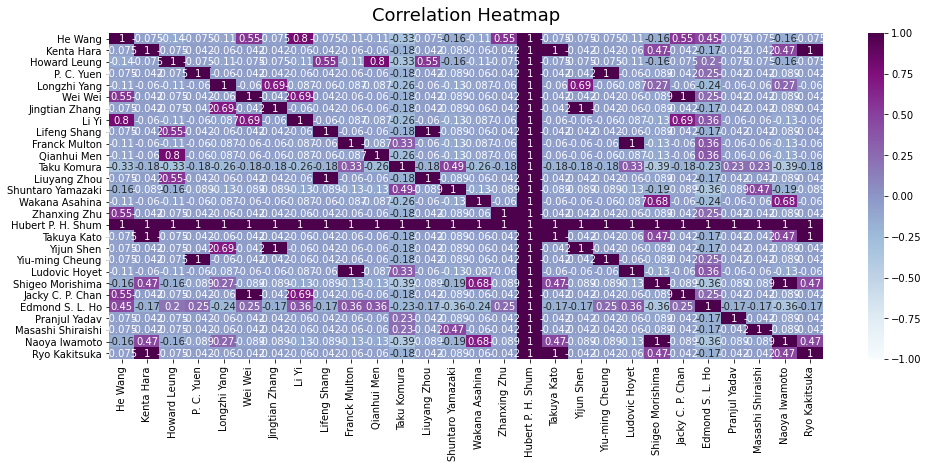

In [40]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df, vmin=-1, vmax=1, annot=True, cmap='BuPu')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
#plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

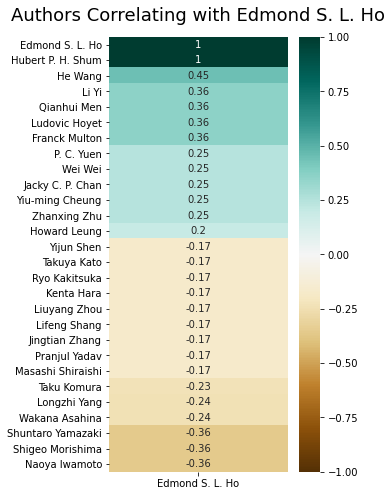

In [41]:
plt.figure(figsize=(4, 8))
heatmap = sns.heatmap(df[['Edmond S. L. Ho']].sort_values(by='Edmond S. L. Ho', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Authors Correlating with Edmond S. L. Ho', fontdict={'fontsize':18}, pad=16);

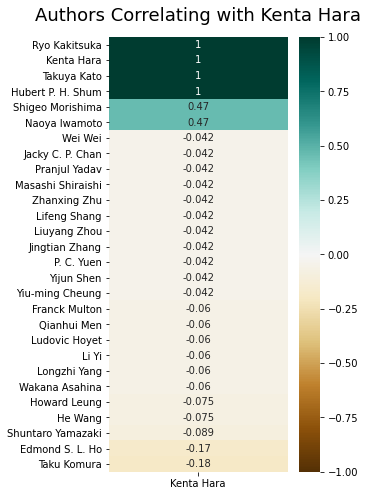

In [42]:
plt.figure(figsize=(4, 8))
heatmap = sns.heatmap(df[['Kenta Hara']].sort_values(by='Kenta Hara', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Authors Correlating with Kenta Hara', fontdict={'fontsize':18}, pad=16);

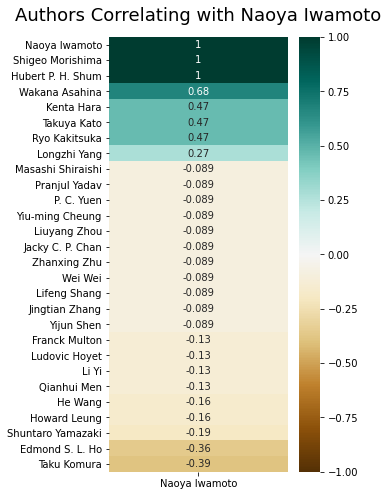

In [43]:
plt.figure(figsize=(4, 8))
heatmap = sns.heatmap(df[['Naoya Iwamoto']].sort_values(by='Naoya Iwamoto', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Authors Correlating with Naoya Iwamoto', fontdict={'fontsize':18}, pad=16);

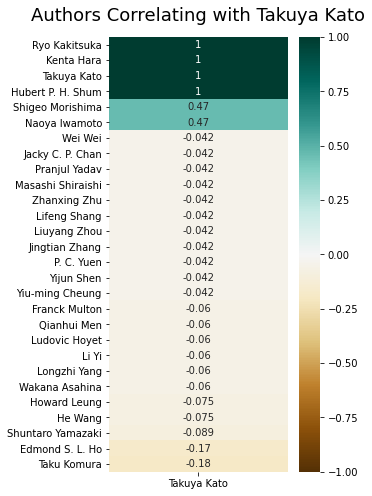

In [44]:
plt.figure(figsize=(4, 8))
heatmap = sns.heatmap(df[['Takuya Kato']].sort_values(by='Takuya Kato', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Authors Correlating with Takuya Kato', fontdict={'fontsize':18}, pad=16);

In [45]:
############################

In [46]:
#######################
#Question 5
#Please design and implement the solution to use data analysis and visualization for analysing
#how the features of a publication would affect its “citation” (a value that can be found in the
#publication detail pages).
######################
#Begin creating the data file by importing csv
import csv
#Lists to be used in the data file
Title = Titles
Author = Authors
Date = Dates
Journal = Journals
Publisher = Publishers
No_Pages = NumberOfPages
Citation = Citations
ImpactFactor = ImpactFactors


file = open("citationData.csv", "w", newline ="")
writer = csv.writer(file)

for w in range(25):

    writer.writerow([Citation[w], Title[w], Author[w], Date[w], Journal[w], Publisher[w], No_Pages[w], 
                      ImpactFactor[w]])

file.close()



In [47]:
import pandas as pd
data = 'citationData.csv'
column_names = [ 'Citation','Title', 'Author/s', 'Date', 'Journal', 'Publisher', 'NumberOfPages',
                'Impact Factor',]

raw_data = pd.read_csv(data, names=column_names,
                          na_values='NA')

In [48]:
citationData = raw_data.copy()
citationData

,Citation,Title,Author/s,Date,Journal,Publisher,NumberOfPages,Impact Factor
0,74,Spatio-temporal Manifold Learning for Human Mo...,"['He Wang', ' Edmond S. L. Ho', ' Hubert P. H....",2021,IEEE Transactions on Visualization and Compute...,IEEE,12.0,4.579
1,13,A Quadruple Diffusion Convolutional Recurrent ...,"['Qianhui Men', ' Edmond S. L. Ho', ' Hubert P...",2021,IEEE Transactions on Circuits and Systems for ...,IEEE,16.0,4.685
2,0,GAN-based Reactive Motion Synthesis with Class...,"['Qianhui Men', ' Hubert P. H. Shum', ' Edmond...",2021,Computers and Graphics,Elsevier,12.0,1.936
3,6,A Generic Framework for Editing and Synthesizi...,"['Jacky C. P. Chan', ' Hubert P. H. Shum', ' H...",2019,Computer Animation and Virtual Worlds,John Wiley and Sons Ltd.,20.0,1.020
4,0,Automatic Sign Dance Synthesis from Gesture-ba...,"['Naoya Iwamoto', ' Hubert P. H. Shum', ' Waka...",2019,MIG,ACM,9.0,NaN
5,4,DanceDJ: A 3D Dance Animation Authoring System...,"['Naoya Iwamoto', ' Takuya Kato', ' Hubert P. ...",2017,ACE,NaN,18.0,NaN
6,3,Synthesizing Motion with Relative Emotion Stre...,"['Edmond S. L. Ho', ' Hubert P. H. Shum', ' He...",2017,D2AT,NaN,8.0,NaN
7,6,Automatic Dance Generation System Considering ...,"['Wakana Asahina', ' Naoya Iwamoto', ' Hubert ...",2016,SIGGRAPH,ACM,2.0,NaN
8,1,Depth Sensor based Facial and Body Animation C...,"['Yijun Shen', ' Jingtian Zhang', ' Longzhi Ya...",2016,Motion,Springer International Publishing,16.0,NaN
9,14,Multi-layer Lattice Model for Real-Time Dynami...,"['Naoya Iwamoto', ' Hubert P. H. Shum', ' Long...",2015,Computer Graphics Forum,John Wiley and Sons Ltd.,11.0,2.078


In [49]:
citationData.isna().sum()

Citation          0
Title             0
Author/s          0
Date              0
Journal           2
Publisher         3
NumberOfPages     1
Impact Factor    14
dtype: int64

In [50]:
citationData = citationData.dropna()

In [51]:
citationData

,Citation,Title,Author/s,Date,Journal,Publisher,NumberOfPages,Impact Factor
0,74,Spatio-temporal Manifold Learning for Human Mo...,"['He Wang', ' Edmond S. L. Ho', ' Hubert P. H....",2021,IEEE Transactions on Visualization and Compute...,IEEE,12.0,4.579
1,13,A Quadruple Diffusion Convolutional Recurrent ...,"['Qianhui Men', ' Edmond S. L. Ho', ' Hubert P...",2021,IEEE Transactions on Circuits and Systems for ...,IEEE,16.0,4.685
2,0,GAN-based Reactive Motion Synthesis with Class...,"['Qianhui Men', ' Hubert P. H. Shum', ' Edmond...",2021,Computers and Graphics,Elsevier,12.0,1.936
3,6,A Generic Framework for Editing and Synthesizi...,"['Jacky C. P. Chan', ' Hubert P. H. Shum', ' H...",2019,Computer Animation and Virtual Worlds,John Wiley and Sons Ltd.,20.0,1.020
9,14,Multi-layer Lattice Model for Real-Time Dynami...,"['Naoya Iwamoto', ' Hubert P. H. Shum', ' Long...",2015,Computer Graphics Forum,John Wiley and Sons Ltd.,11.0,2.078
10,6,Human Motion Variation Synthesis with Multivar...,"['Liuyang Zhou', ' Lifeng Shang', ' Hubert P. ...",2014,Computer Animation and Virtual Worlds,John Wiley and Sons Ltd.,9.0,1.020
11,26,Topology Aware Data-Driven Inverse Kinematics,"['Edmond S. L. Ho', ' Hubert P. H. Shum', ' Yi...",2013,Computer Graphics Forum,John Wiley and Sons Ltd.,10.0,2.078
12,1,Natural Preparation Behavior Synthesis,"['Hubert P. H. Shum', ' Ludovic Hoyet', ' Edmo...",2013,Computer Animation and Virtual Worlds,John Wiley and Sons Ltd.,10.0,1.020
14,68,Simulating Multiple Character Interactions wit...,"['Hubert P. H. Shum', ' Taku Komura ', ' Shunt...",2012,IEEE Transactions on Visualization and Compute...,IEEE,12.0,4.579
18,11,Angular Momentum Guided Motion Concatenation,"['Hubert P. H. Shum', ' Taku Komura ', ' Pranj...",2009,Computer Animation and Virtual Worlds,John Wiley and Sons Ltd.,10.0,1.020


In [52]:
citationData['NumberOfPages'] = citationData['NumberOfPages'].astype('int')
#citationData

<ipython-input-52-09995ed25a01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citationData['NumberOfPages'] = citationData['NumberOfPages'].astype('int')


In [53]:
######################################################

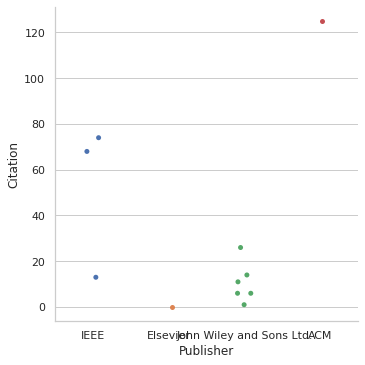

In [54]:
sns.set_theme(style="whitegrid", palette='deep')
sns.catplot(x='Publisher', y='Citation', data=citationData)

/apps/jupyterhub/COMP42315/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


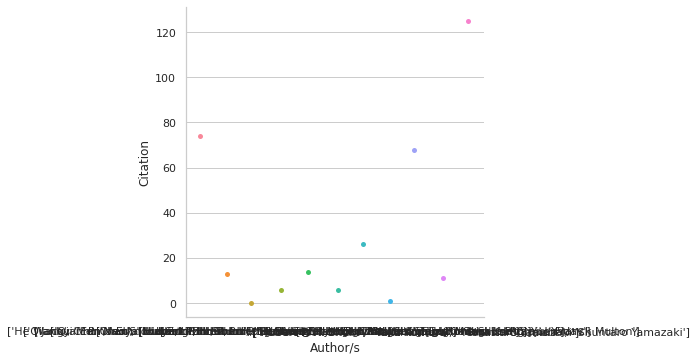

In [55]:
sns.catplot(x='Author/s', y='Citation', data=citationData)

In [56]:
citationDataXCoef= citationData.drop(['Author/s', 'Journal','Publisher'], axis=1)

In [57]:
citationDataXCoef = pd.get_dummies(citationData, columns=['Title'], prefix='', prefix_sep='')

In [58]:
df = citationDataXCoef.corr()

In [59]:
df

,Citation,Date,NumberOfPages,Impact Factor,A Generic Framework for Editing and Synthesizing Multimodal Data with Relative Emotion Strength,A Quadruple Diffusion Convolutional Recurrent Network for Human Motion Prediction,Angular Momentum Guided Motion Concatenation,GAN-based Reactive Motion Synthesis with Class-aware Discriminators for Human-human Interaction,Human Motion Variation Synthesis with Multivariate Gaussian Processes,Interaction Patches for Multi-Character Animation,Multi-layer Lattice Model for Real-Time Dynamic Character Deformation,Natural Preparation Behavior Synthesis,Simulating Multiple Character Interactions with Collaborative and Adversarial Goals,Spatio-temporal Manifold Learning for Human Motions via Long-horizon Modeling,Topology Aware Data-Driven Inverse Kinematics
Citation,1.000000,-0.360005,-0.322661,0.811443,-0.208239,-0.150561,-0.167040,-0.257677,-0.208239,0.772281,-0.142321,-0.249437,0.302620,0.352058,-0.043446
Date,-0.360005,1.000000,0.656031,0.043319,0.272174,0.411425,-0.424085,0.411425,-0.075955,-0.493710,-0.006330,-0.145581,-0.215207,0.411425,-0.145581
NumberOfPages,-0.322661,0.656031,1.000000,-0.046018,0.791180,0.404381,-0.175818,0.017582,-0.272518,-0.369217,-0.079118,-0.175818,0.017582,0.017582,-0.175818
Impact Factor,0.811443,0.043319,-0.046018,1.000000,-0.311785,0.378512,-0.311785,-0.139258,-0.311785,0.515817,-0.112512,-0.311785,0.358547,0.358547,-0.112512
A Generic Framework for Editing and Synthesizing Multimodal Data with Relative Emotion Strength,-0.208239,0.272174,0.791180,-0.311785,1.000000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000
A Quadruple Diffusion Convolutional Recurrent Network for Human Motion Prediction,-0.150561,0.411425,0.404381,0.378512,-0.100000,1.000000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000
Angular Momentum Guided Motion Concatenation,-0.167040,-0.424085,-0.175818,-0.311785,-0.100000,-0.100000,1.000000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000
GAN-based Reactive Motion Synthesis with Class-aware Discriminators for Human-human Interaction,-0.257677,0.411425,0.017582,-0.139258,-0.100000,-0.100000,-0.100000,1.000000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000
Human Motion Variation Synthesis with Multivariate Gaussian Processes,-0.208239,-0.075955,-0.272518,-0.311785,-0.100000,-0.100000,-0.100000,-0.100000,1.000000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000
Interaction Patches for Multi-Character Animation,0.772281,-0.493710,-0.369217,0.515817,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,1.000000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000


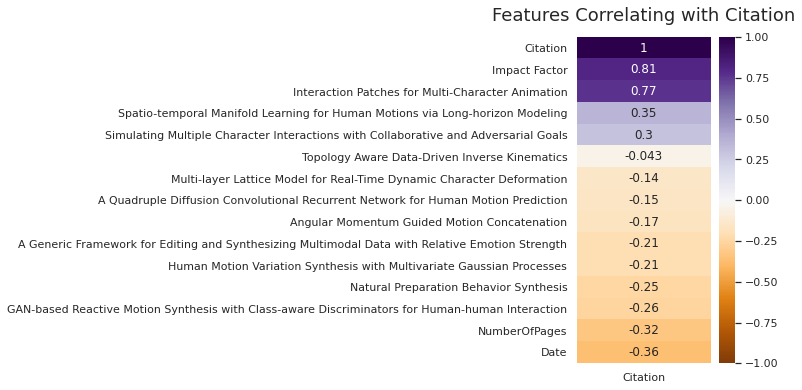

In [64]:
plt.figure(figsize=(3, 6))
heatmap = sns.heatmap(df[['Citation']].sort_values(by='Citation', ascending=False), vmin=-1, vmax=1, annot=True, cmap='PuOr')
heatmap.set_title('Features Correlating with Citation', fontdict={'fontsize':18}, pad=16);

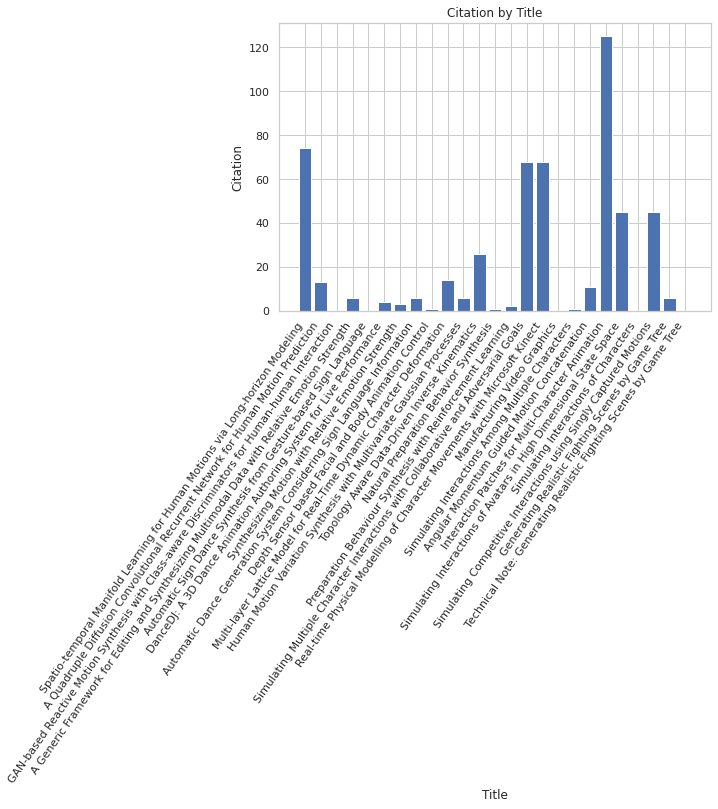

In [65]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Title = Title
Citation = Citation
ax.bar(Title,Citation)
plt.xticks(range(len(Title)), Title, rotation=55, ha="right")
ax.set_xlabel('Title')
ax.set_ylabel('Citation')
ax.set_title('Citation by Title')
plt.show()

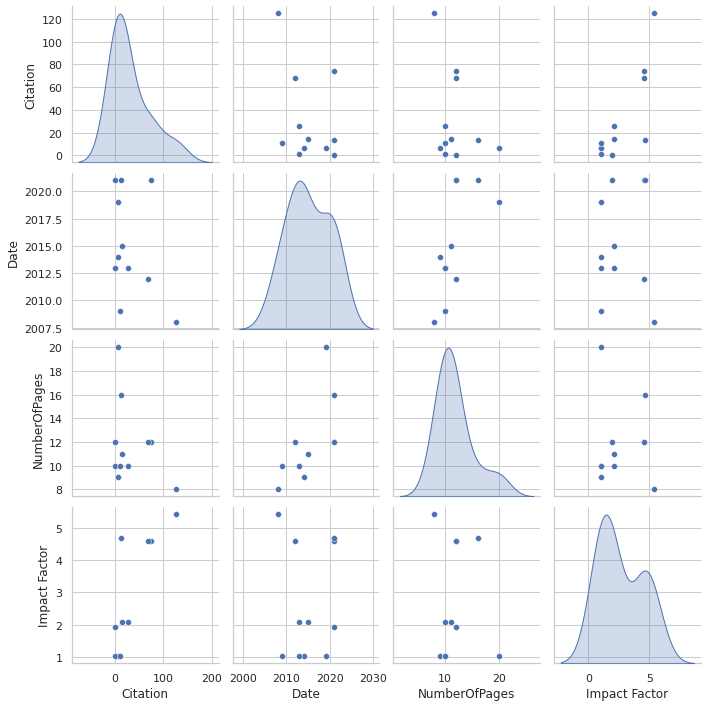

In [66]:
import seaborn as sns
sns.pairplot(citationData[['Citation', 'Date', 'NumberOfPages', 'Impact Factor']], diag_kind='kde')

In [67]:
##########################
#Regression
##########################

In [68]:
############################

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [70]:
###########################
#Date

In [71]:
df = citationData

X = df['Date'].values.reshape(-1,1)
y = df['Citation'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [72]:
ols = linear_model.LinearRegression()
model = ols.fit(X_train, y_train)
response = model.predict(X_train)

In [73]:
r2 = model.score(X_train, y_train)

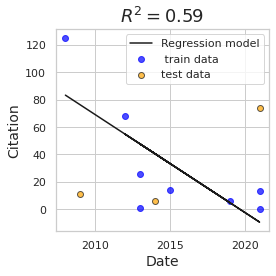

In [74]:
#plt.style.use('default')
#plt.style.use('ggplot')


fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(X_train, response, color='k', label='Regression model')
ax.scatter(X_train, y_train, edgecolor='blue', facecolor='blue', alpha=0.7, label=' train data')
ax.scatter(X_test, y_test, edgecolor='k', facecolor='orange', alpha=0.7, label='test data')
ax.set_ylabel('Citation', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)
ax.locator_params(integer=True)

fig.tight_layout()


In [75]:
##########################################
#Number of Pages

In [76]:
df = citationData

X = df['NumberOfPages'].values.reshape(-1,1)
y = df['Citation'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [77]:
ols = linear_model.LinearRegression()
model = ols.fit(X_train, y_train)
response = model.predict(X_train)

In [78]:
r2 = model.score(X_train, y_train)

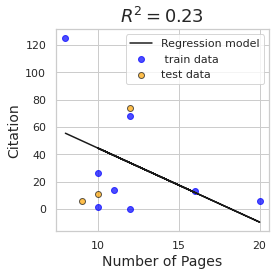

In [79]:
#plt.style.use('default')
#plt.style.use('ggplot')


fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(X_train, response, color='k', label='Regression model')
ax.scatter(X_train, y_train, edgecolor='blue', facecolor='blue', alpha=0.7, label=' train data')
ax.scatter(X_test, y_test, edgecolor='k', facecolor='orange', alpha=0.7, label='test data')
ax.set_ylabel('Citation', fontsize=14)
ax.set_xlabel('Number of Pages', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)
ax.locator_params(integer=True)

fig.tight_layout()

In [80]:
#################################

In [81]:
df = citationData

X = df['Impact Factor'].values.reshape(-1,1)
y = df['Citation'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [82]:
ols = linear_model.LinearRegression()
model = ols.fit(X_train, y_train)
response = model.predict(X_train)

In [83]:
r2 = model.score(X_train, y_train)

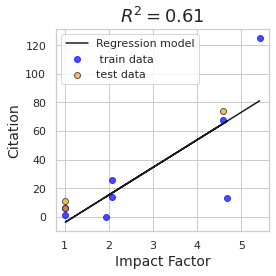

In [84]:
#plt.style.use('default')
#plt.style.use('ggplot')


fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(X_train, response, color='k', label='Regression model')
ax.scatter(X_train, y_train, edgecolor='blue', facecolor='blue', alpha=0.7, label=' train data')
ax.scatter(X_test, y_test, edgecolor='k', facecolor='orange', alpha=0.7, label='test data')
ax.set_ylabel('Citation', fontsize=14)
ax.set_xlabel('Impact Factor', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)
ax.locator_params(integer=True)

fig.tight_layout()